<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/potatoleafe(D478).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
datadir='/content/drive/MyDrive/Colab Notebooks/A>>>>>project 1/PlantVillage'
classe=['Potato___Early_blight','Potato___Late_blight','Potato___healthy']

In [ ]:
datset=keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/A>>>>>project 1/PlantVillage",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [ ]:
classes=datset.class_names

In [ ]:
len(datset)

68

(32, 256, 256, 3)
[2 2 1 2 0 0 0 1 1 0 2 1 0 0 0 1 0 0 1 0 2 0 0 1 2 2 0 0 2 1 0 0]


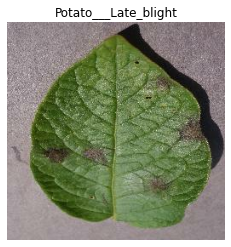

In [ ]:
for i_batcht ,l_batch in datset.take(1):
  print(i_batcht.shape)
  print(l_batch.numpy())
  plt.imshow(i_batcht[8].numpy().astype('uint8'))
  plt.title(classe[l_batch[8]])
  plt.axis('off')

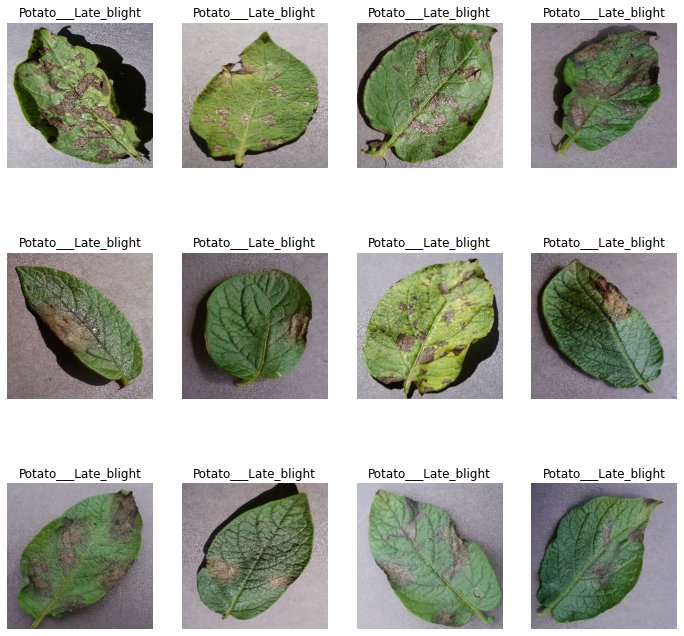

In [ ]:
plt.figure(figsize=(12,12))
for i_batcht ,l_batch in datset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
  
    plt.imshow(i_batcht[i].numpy().astype('uint8'))
    plt.title(classe[l_batch[8]])
    plt.axis('off')

In [ ]:
train=0.8
len(datset)*train

54.400000000000006

In [ ]:
train_ds=datset.take(54)


In [ ]:
test_ds=datset.skip(54)
len(test_ds)

14

In [ ]:
v=0.1
len(datset)*v


6.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(datset)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
len(val_ds)

6

In [ ]:
train_ds=train_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_scale=keras.Sequential([
                               keras.layers.experimental.preprocessing.Resizing(256,256),
                               keras.layers.experimental.preprocessing.Rescaling(1/255)
])

In [ ]:
Augment=keras.Sequential([
                               keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                               keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
from keras import layers

In [ ]:
input_size=(2,256,256,3)
n_class=3
model=keras.models.Sequential([
                               resize_scale,Augment,
                               layers.Conv2D(32,(3,3),activation='relu',input_shape=input_size),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Conv2D(64,(3,3),activation='relu'),
                               layers.MaxPooling2D((2,2)),
                               layers.Flatten(),
                               layers.Dense(64,activation='relu'),
                               layers.Dense(n_class,activation='softmax')
])
model.build(
    input_shape=input_size
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (2, 256, 256, 3)          0         
_________________________________________________________________
sequential_1 (Sequential)    (2, 256, 256, 3)          0         
_________________________________________________________________
conv2d (Conv2D)              (2, 254, 254, 32)         896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (2, 127, 127, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (2, 125, 125, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (2, 62, 62, 64)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (2, 60, 60, 64)          

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    batch_size=2,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)

Epoch 1/50
54/54 [==============================] - 269s 216ms/step - loss: 0.9187 - accuracy: 0.4583 - val_loss: 0.8465 - val_accuracy: 0.5833
Epoch 2/50
54/54 [==============================] - 17s 217ms/step - loss: 0.5875 - accuracy: 0.7746 - val_loss: 0.5870 - val_accuracy: 0.7679
Epoch 3/50
54/54 [==============================] - 16s 209ms/step - loss: 0.3900 - accuracy: 0.8533 - val_loss: 0.2702 - val_accuracy: 0.8906
Epoch 4/50
54/54 [==============================] - 16s 208ms/step - loss: 0.2655 - accuracy: 0.9020 - val_loss: 0.2785 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 16s 207ms/step - loss: 0.2215 - accuracy: 0.9208 - val_loss: 0.1846 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 16s 208ms/step - loss: 0.2010 - accuracy: 0.9261 - val_loss: 0.1276 - val_accuracy: 0.9479
Epoch 7/50
54/54 [==============================] - 16s 208ms/step - loss: 0.1726 - accuracy: 0.9296 - val_loss: 0.1337 - val_accuracy: 0.942

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 38ms/step - loss: 0.0939 - accuracy: 0.9688


In [ ]:
scores

[0.09392265975475311, 0.96875]

In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 54, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
loss=history.history['loss']
val_ls=history.history['val_loss']
val_ac=history.history['val_accuracy']

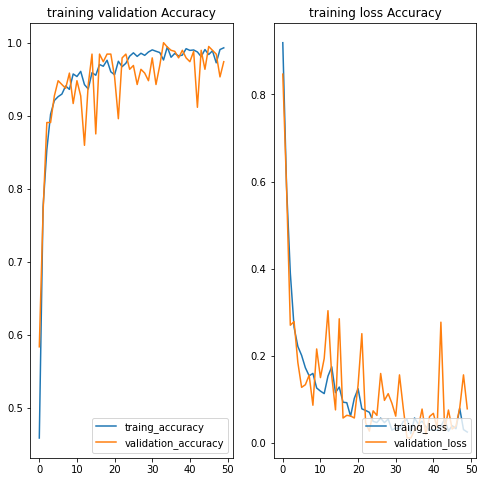

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='traing_accuracy')
plt.plot(range(50),val_ac,label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('training validation Accuracy')
plt.subplot(1,2,2)
plt.plot(range(50),loss,label='traing_loss')
plt.plot(range(50),val_ls,label='validation_loss')
plt.legend(loc='lower right')
plt.title('training loss Accuracy')
plt.show()

First Image
Potato___Early_blight


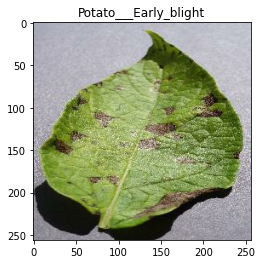

In [ ]:
for img_batch,label_batch in test_ds.take(1):
  f_img=(img_batch[0].numpy().astype('uint8'))
  f_label=label_batch[0].numpy()
  print("First Image")
  plt.imshow(f_img)
  plt.title(classes[f_label])
  batch_pred=model.predict(img_batch)
  print(classes[np.argmax(batch_pred[0])])


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


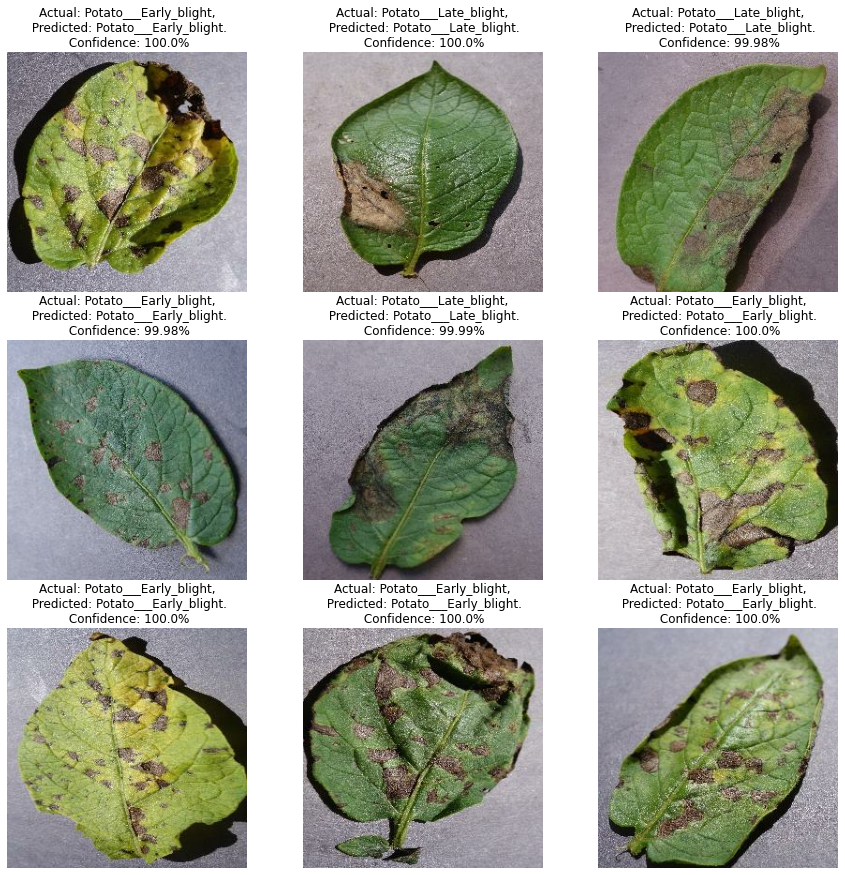

In [ ]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model_version=1
model.save(f'/content/drive/MyDrive/Colab Notebooks/A>>>>>project 1/model/{model_version}')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/A>>>>>project 1/model/1/assets


In [ ]:
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/Colab Notebooks/A>>>>>project 1/model")])+1
model.save(f'/content/drive/MyDrive/Colab Notebooks/A>>>>>project 1/model/{model_version}')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/A>>>>>project 1/model/4/assets
